### 學習利用第三方套件使用樹型模型
在先前的課程中，我們學習到如何使用Python從頭開始實作決策樹與隨機森林。但我們可以利用第三方的套件來使用已經實作好的模型，並非每次都需要
重造輪子。

在這次的課程中，我們會使用經典的機器學習套件`sklearn`來使用樹型模型。

### 安裝sklearn套件

在使用`sklearn`之前，需要先行安裝此套件，安裝的方式很簡單，只需要利用Python的套件管理器`pip`就可以了。

```bash
pip install scikit-learn
```

### 載入需要的套件(Library)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

### 生成假數據
這次的課程，我們會使用sklearn中的方法來生成假數據

In [2]:
# 生成假數據
x, y = make_gaussian_quantiles(cov=2.0, n_samples=500, n_features=2, n_classes=2, random_state=1)

# 一共有500筆資料，每筆資料有兩個特徵值
print(x.shape, y.shape)

(500, 2) (500,)


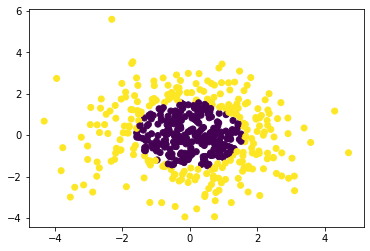

In [3]:
# 視覺化查看生成數據
# 可以發現數據明顯分為兩類(內圈與外圍)
plt.scatter(x[:,0], x[:,1], marker='o', c=y)
plt.show()

### 分割資料集
在先前的課程中，我們自己時做了分割資料集的函式，在這裡我們會利用`sklearn.model_selection.train_test_split`來進行訓練集與驗證集

的分割

`sklearn.model_selection.train_test_split`:

主要參數:

* test_size: 分割的測試集大小，可給定個數(int)或比例(float)
* random_state: 給定一個隨機種子(int)，便於在隨機分割時可以重複實現結果(每次分割的結果都相同)
* shuffle: 在分割資料時是否需要做隨機打亂數據，預設值為True

這裡列出常用的參數，其中還有其他參數，學員可以參考[官方網站](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)了解更多

In [4]:
#分割數據(訓練集佔80%, 測試集佔20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, shuffle=True)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(400, 2) (100, 2)
(400,) (100,)


### 使用決策樹(Decision)進行分類
此部分我們使用決策樹來對生成資料進行分類，在`sklearn`中的決策樹為:

`sklearn.tree.DecisionTreeClassifier`:

主要參數:

* criterion: 給定使用計算訊息增益的方法，有"gini"與"entropy"，預設值為"entropy"
* max_depth: 樹最深可生長深度
* min_samples_split: 可分割節點最少需含樣本數
* min_samples_leaf: 最為終端節點(leaf node)最少需含樣本數，預設為1
* max_leaf_nodes: 最多終端節點數

這裡列出常用的參數，其中還有其他參數，學員可以參考[官方網站](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)了解更多

In [5]:
#建立決策樹模型
decision_tree_cls = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                           min_samples_split=10, min_samples_leaf=5)

#使用決策樹模型進行訓練
decision_tree_cls.fit(x_train, y_train)

#以訓練好的決策樹進行預測
y_pred = decision_tree_cls.predict(x_test)

In [6]:
# 計算決策樹的準確度
def cal_acc(y_true, y_pred):
    
    return sum(y_true == y_pred) / len(y_test)

print(f"Accuracy: {cal_acc(y_test, y_pred)}")

Accuracy: 0.86


In [7]:
# 也可以使用DecisionTreeClassifier內建的方法來計算準確度
print(f"Accuracy: {decision_tree_cls.score(x_test,y_test)}")

# 查看決策樹深度與終端節點個數
print(f"Depth: {decision_tree_cls.get_depth()}, Number of leaves: {decision_tree_cls.get_n_leaves()}")

Accuracy: 0.86
Depth: 3, Number of leaves: 5


In [8]:
# 先前的課程中提到，我們可以透過feature被使用來分割的次數得知feature的重要程度
# 我們可以透過feature_importance_來得到重要程度的值，且所有feature的重要程度合為1

print("Importance:")
print(f"feature_1: {decision_tree_cls.feature_importances_[0]}")
print(f"feature_2: {decision_tree_cls.feature_importances_[1]}")
print(f"Total: {decision_tree_cls.feature_importances_[0] + decision_tree_cls.feature_importances_[1]}")

Importance:
feature_1: 0.3415865276600187
feature_2: 0.6584134723399814
Total: 1.0


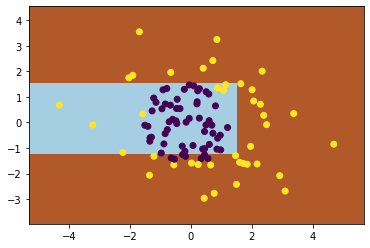

In [9]:
#視覺化分類結果
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = decision_tree_cls.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1))
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x_test[:, 0], x_test[:, 1], marker='o', c=y_test)
plt.show()

#可以發現在藍色決策邊界內，有存在幾個黃色的類別樣本，那些樣本及模型分類錯誤的樣本

[Text(209.25, 190.26, 'X[1] <= 1.569\nentropy = 0.998\nsamples = 400\nvalue = [190, 210]'),
 Text(167.4, 135.9, 'X[1] <= -1.243\nentropy = 0.991\nsamples = 341\nvalue = [190, 151]'),
 Text(83.7, 81.53999999999999, 'X[1] <= -1.484\nentropy = 0.211\nsamples = 60\nvalue = [2, 58]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 1.54\nentropy = 0.916\nsamples = 281\nvalue = [188, 93]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.772\nsamples = 243\nvalue = [188, 55]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(251.10000000000002, 135.9, 'entropy = 0.0\nsamples = 59\nvalue = [0, 59]')]

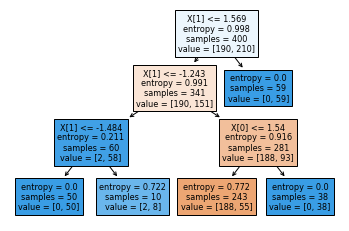

In [10]:
# 透過sklearn.tree.plot_tree，可以視覺化決策樹決策過程
plot_tree(decision_tree_cls, filled=True)

### 使用隨機森林(RandomForest)進行分類
此部分我們使用隨機森林來對生成資料進行分類，在`sklearn`中的隨機森林為:

`sklearn.ensemble.RandomForestClassifier`:

主要參數:

* n_estimators: 在隨機森林中決策樹個數，預設值為100 (100顆決策樹)
* criterion: 給定使用計算訊息增益的方法，有"gini"與"entropy"，預設值為"entropy"
* max_depth: 樹最深可生長深度
* min_samples_split: 可分割節點最少需含樣本數
* min_samples_leaf: 最為終端節點(leaf node)最少需含樣本數，預設為1
* max_leaf_nodes: 最多終端節點數

這裡列出常用的參數，其中還有其他參數，學員可以參考[官方網站](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)了解更多

In [11]:
#建立隨機森林模型
forest_cls = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=3,
                                           min_samples_split=10, min_samples_leaf=5)

#使用隨機森林模型進行訓練
forest_cls.fit(x_train, y_train)

#以訓練好的隨機森林進行預測
y_pred = forest_cls.predict(x_test)

In [12]:
# 計算準確度
print(f"Accuracy: {forest_cls.score(x_test,y_test)}")

# 查看隨機森林含的決策樹個數
print(f"Number of trees: {len(forest_cls.estimators_)}")

Accuracy: 0.89
Number of trees: 50


In [13]:
# 透過feature_importance_來得到重要程度的值，且所有feature的重要程度合為1

print("Importance:")
print(f"feature_1: {forest_cls.feature_importances_[0]}")
print(f"feature_2: {forest_cls.feature_importances_[1]}")
print(f"Total: {forest_cls.feature_importances_[0] + forest_cls.feature_importances_[1]}")

Importance:
feature_1: 0.48306672436835546
feature_2: 0.5169332756316446
Total: 1.0


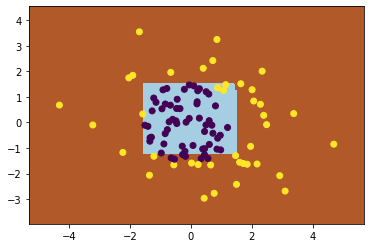

In [16]:
#視覺化分類結果
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = forest_cls.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1))
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x_test[:, 0], x_test[:, 1], marker='o', c=y_test)
plt.show()

#可以發現在藍色決策邊界內，有存在幾個黃色的類別樣本，那些樣本及模型分類錯誤的樣本

In [27]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

NameError: name 'data' is not defined

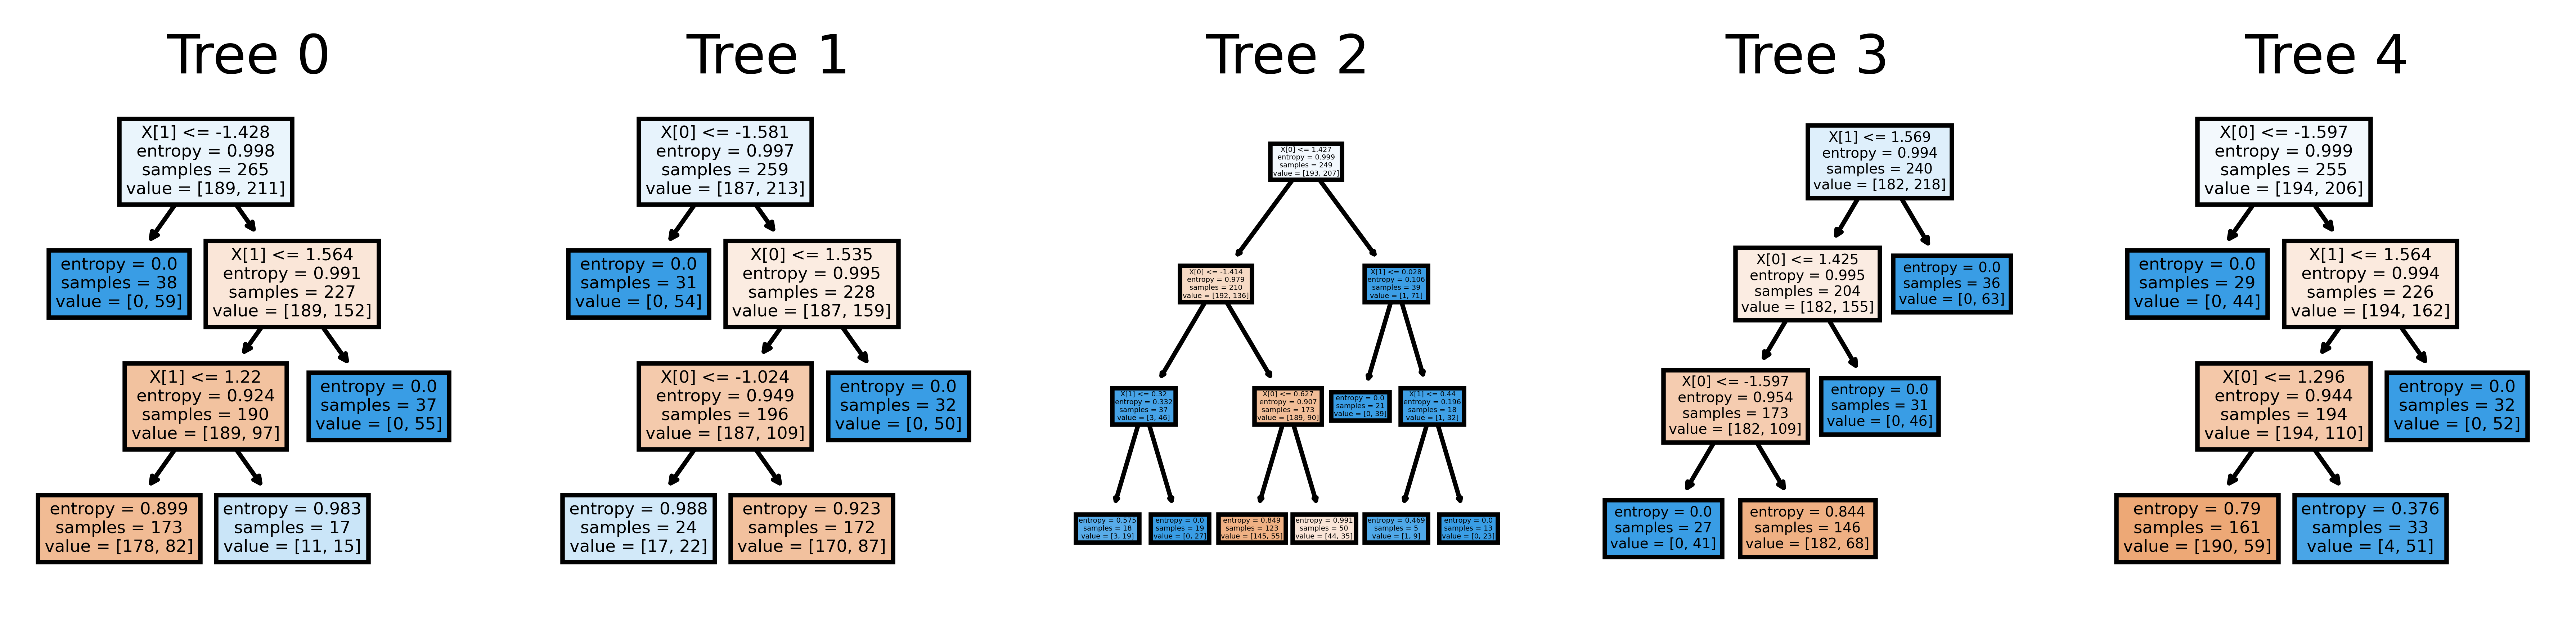

In [18]:
# 視覺化前五棵樹
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)

for i, tree in enumerate(forest_cls.estimators_[:5]):
    plot_tree(tree, filled=True, ax = axes[i])
    axes[i].set_title(f"Tree {i}")

### 使用Adaboost進行分類
此部分我們使用隨機森林來對生成資料進行分類，在`sklearn`中的隨機森林為:

`sklearn.ensemble.AdaBoostClassifier`:

主要參數:

* base_estimator: 指定基礎分類器，可以是各種不同分類器(ex: DecisionTreeClassifier, LogisticRegression)
* n_estimators: 最多的分類器個數
* learning_rate: 每個分類器的權重衰減速率

這裡列出常用的參數，其中還有其他參數，學員可以參考[官方網站](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)了解更多

In [21]:
#建立adaboost模型
adaboost_cls = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=3,
                                                                        min_samples_split=10,
                                                                        min_samples_leaf=5),
                                  n_estimators=50,
                                  learning_rate=0.8)

#使用adaboost模型進行訓練
adaboost_cls.fit(x_train, y_train)

#以訓練好的adaboost進行預測
y_pred = adaboost_cls.predict(x_test)

In [22]:
# 計算準確度
print(f"Accuracy: {adaboost_cls.score(x_test,y_test)}")

# 查看adaboost含的分類器個數
print(f"Number of trees: {len(adaboost_cls.estimators_)}")

Accuracy: 0.98
Number of trees: 50


In [23]:
# 計算adaboost每個子分類器的準確度
list(adaboost_cls.staged_score(x_test,y_test))

[0.86,
 0.92,
 0.9,
 0.99,
 0.99,
 0.97,
 0.94,
 0.94,
 0.94,
 0.92,
 0.92,
 0.96,
 0.97,
 0.97,
 0.97,
 0.96,
 0.96,
 0.96,
 0.96,
 0.98,
 0.98,
 0.98,
 0.96,
 0.96,
 0.96,
 0.97,
 0.96,
 0.96,
 0.97,
 0.98,
 0.98,
 0.97,
 0.97,
 0.97,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98]

In [24]:
# 透過feature_importance_來得到重要程度的值，且所有feature的重要程度合為1

print("Importance:")
print(f"feature_1: {adaboost_cls.feature_importances_[0]}")
print(f"feature_2: {adaboost_cls.feature_importances_[1]}")
print(f"Total: {adaboost_cls.feature_importances_[0] + adaboost_cls.feature_importances_[1]}")

Importance:
feature_1: 0.5183289844095946
feature_2: 0.4816710155904055
Total: 1.0


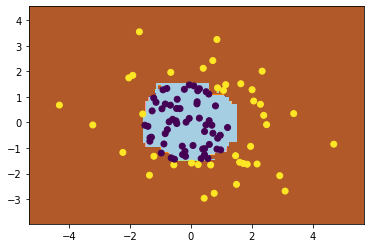

In [25]:
#視覺化分類結果
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = adaboost_cls.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1))
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x_test[:, 0], x_test[:, 1], marker='o', c=y_test)
plt.show()

#可以發現在藍色決策邊界內，有存在幾個黃色的類別樣本，那些樣本及模型分類錯誤的樣本